In [1]:
import os
import numpy as np
import scipy.interpolate as spip

In [2]:
IM_dir = "/Users/deyanmihaylov/Documents/Work/inflation/InflationModels"
FC_dir = "/Users/deyanmihaylov/Documents/Work/inflation/FlowCode"


In [64]:
for i in range(205):
    if i > 10: break
    IM_path = os.path.join(IM_dir, f"path{i:03}.dat")
    FC_path = os.path.join(FC_dir, f"path{i:03}.dat")

    IM_path_f = np.genfromtxt(IM_path, delimiter=",")
    FC_path_f = np.genfromtxt(FC_path)

    for idx in range(FC_path_f.shape[1]):
        if idx == 8: continue

        FC_interp = spip.InterpolatedUnivariateSpline(FC_path_f[:, 8], FC_path_f[:, idx])
        IM_interp = spip.InterpolatedUnivariateSpline(IM_path_f[:, 8], IM_path_f[:, idx])
        
        int_start = np.max([FC_path_f[0, 8], IM_path_f[0, 8]])
        int_end = np.min([FC_path_f[-1, 8], IM_path_f[-1, 8]])
        
        interval = np.linspace(int_start, int_end, 100000)
        dx = interval[1] - interval[0]

        FC_evald = FC_interp(interval)
        IM_evald = IM_interp(interval)

        diff = dx * np.sum(np.abs(FC_evald - IM_evald)**2)

        if diff > 1e-4: print(i, idx, diff)
    print()
    







6 2 0.00031468836822851683
6 3 0.0022430720099530094

7 3 0.0007020459932304338

8 0 0.00022678343419527618
8 3 0.0002836618486421018

9 0 0.0005151767195388631
9 3 0.00029311153082165094

10 3 0.0018570945867555924



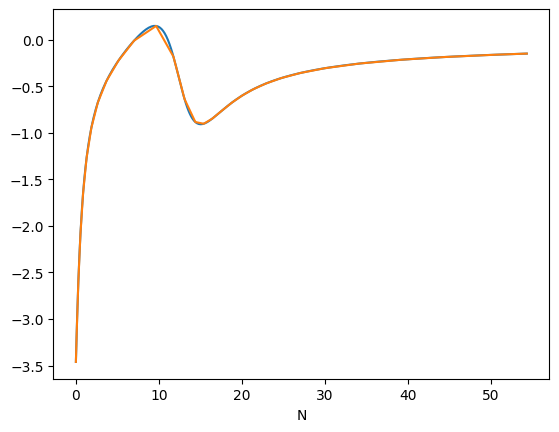

In [62]:
import matplotlib.pyplot as plt

IM_path = os.path.join(IM_dir, f"path004.dat")
FC_path = os.path.join(FC_dir, f"path004.dat")

IM_path_f = np.genfromtxt(IM_path, delimiter=",")
FC_path_f = np.genfromtxt(FC_path)

plt.plot(FC_path_f[:, 8], FC_path_f[:, 3])
plt.plot(IM_path_f[:, 8], IM_path_f[:, 3])

plt.xlabel("N")

plt.show()

2.0335946724251373e-06
9.887744976635744e-14
2.6948526788084213e-06
8.108607663440824e-05
3.5088385900951356e-07
2.1211820288130947e-07
7.413018278230321e-08
3.280657225573772e-10
1.956304246522922e-24
5.185694330016055e-28


In [6]:
from scipy.integrate import solve_ivp

du = np.zeros((3), dtype=np.float32)

def f2(t, u, du, sigma, rho, beta):
    x, y, z = u
    du[0] = sigma * (y - x)
    du[1] = x * (rho - z) - y
    du[2] = x * y - beta * z
    return du

numba_f = numba.jit(f2, nopython=True)


In [13]:
%%timeit -n 1000

sol_new = solve_ivp(
    numba_f,
    tspan,
    u0,
    method='DOP853',
    t_eval=None,
    dense_output=False,
    events=None,
    vectorized=False,
    args=(du,10.0,28.0,2.66),
)

137 ms ± 14.8 ms per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
